<a href="https://colab.research.google.com/github/jorge-flores-py/APRENDIZAJE-AUTOMATICO-1-IAAA1/blob/main/TP2_AA1_aprendizaje_no_supervisado_Jorge_flores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 AA1 Aprendizaje no supervisado

**Jorge Flores**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de clustering y reducción de dimensionalidad**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Clustering&skip=130&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas.  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

In [129]:
# Librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


## 📊 Análisis de Customer Churn Dataset

Este dataset contiene información sobre clientes de una compañía de telecomunicaciones, con el objetivo de analizar su comportamiento y predecir la probabilidad de que abandonen el servicio (**churn**).

---

### Descripción de las variables

| Variable                    | Descripción                                                                 |
|----------------------------|-----------------------------------------------------------------------------|
|
| `Call Failures`            | Número de fallos en llamadas                                               |
| `Complains`                | Binaria: 0 = Sin queja, 1 = Con queja                                       |
| `Subscription Length`      | Total de meses de suscripción                                              |
| `Charge Amount`            | Monto facturado (ordinal: 0 = más bajo, 9 = más alto)                      |
| `Seconds of Use`           | Total de segundos utilizados en llamadas                                   |
| `Frequency of use`         | Cantidad total de llamadas                                                 |
| `Frequency of SMS`         | Total de mensajes SMS enviados                                             |
| `Distinct Called Numbers`  | Número total de números únicos llamados                                    |
| `Age Group`                | Grupo etario (1 = más joven, 5 = más viejo)                                |
| `Tariff Plan`              | Tipo de plan: 1 = "Prepago", 2 = "Contrato"                                |
| `Status`                   | Estado de la cuenta: 1 = Activa, 2 = No activa                             |
| `Churn`                    | Variable objetivo: 1 = Cliente que se dio de baja, 0 = Cliente activo      |
| `Customer Value`           | Valor estimado del cliente según uso e ingresos generados                 |

---


In [130]:
#traemos los datos de: https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset
#cargamos los datos de manera local
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Customer Churn.csv') #cargamos los datos en un df
df.head() #vemos los primeros datos

Saving Customer Churn.csv to Customer Churn (3).csv


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0



## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


## Resolución:

In [131]:
#Primero ponemos en español las columnas para que sea mas intuitivo

df = df.rename(columns={
    "Call  Failure": "Fallas_Llamada",
    "Complains": "Quejas",
    "Subscription  Length": "Meses_Suscripcion",
    "Charge  Amount": "Monto_Cobrado",
    "Seconds of Use": "Segundos_Uso",
    "Frequency of use": "Frecuencia_Llamadas",
    "Frequency of SMS": "Frecuencia_SMS",
    "Distinct Called Numbers": "Numeros_Distintos_Llamados",
    "Age Group": "Grupo_Etario",
    "Tariff Plan": "Tipo_Plan",
    "Status": "Estado_Cuenta",
    "Age": "Edad",
    "Customer Value": "Valor_Cliente",
    "Churn": "Abandono"
})

# Verificar los cambios
df.head()

,Fallas_Llamada,Quejas,Meses_Suscripcion,Monto_Cobrado,Segundos_Uso,Frecuencia_Llamadas,Frecuencia_SMS,Numeros_Distintos_Llamados,Grupo_Etario,Tipo_Plan,Estado_Cuenta,Edad,Valor_Cliente,Abandono
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fallas_Llamada              3150 non-null   int64  
 1   Quejas                      3150 non-null   int64  
 2   Meses_Suscripcion           3150 non-null   int64  
 3   Monto_Cobrado               3150 non-null   int64  
 4   Segundos_Uso                3150 non-null   int64  
 5   Frecuencia_Llamadas         3150 non-null   int64  
 6   Frecuencia_SMS              3150 non-null   int64  
 7   Numeros_Distintos_Llamados  3150 non-null   int64  
 8   Grupo_Etario                3150 non-null   int64  
 9   Tipo_Plan                   3150 non-null   int64  
 10  Estado_Cuenta               3150 non-null   int64  
 11  Edad                        3150 non-null   int64  
 12  Valor_Cliente               3150 non-null   float64
 13  Abandono                    3150 

In [133]:
df.describe()

,Fallas_Llamada,Quejas,Meses_Suscripcion,Monto_Cobrado,Segundos_Uso,Frecuencia_Llamadas,Frecuencia_SMS,Numeros_Distintos_Llamados,Grupo_Etario,Tipo_Plan,Estado_Cuenta,Edad,Valor_Cliente,Abandono
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [134]:
df.isnull().sum()

,0
Fallas_Llamada,0
Quejas,0
Meses_Suscripcion,0
Monto_Cobrado,0
Segundos_Uso,0
Frecuencia_Llamadas,0
Frecuencia_SMS,0
Numeros_Distintos_Llamados,0
Grupo_Etario,0
Tipo_Plan,0


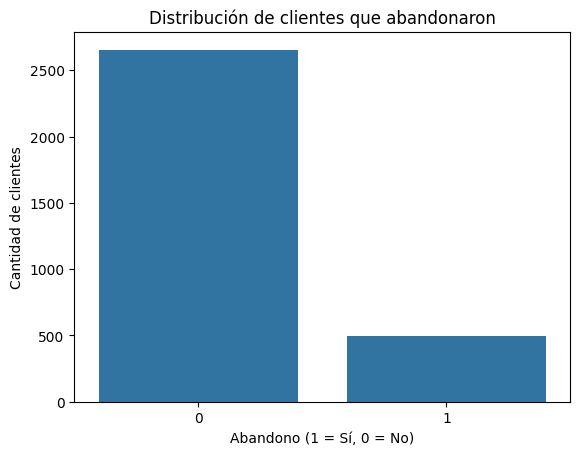

In [135]:
# abandonos vs no abandonos
sns.countplot(x='Abandono', data=df)
plt.title("Distribución de clientes que abandonaron")
plt.xlabel("Abandono (1 = Sí, 0 = No)")
plt.ylabel("Cantidad de clientes")
plt.show()


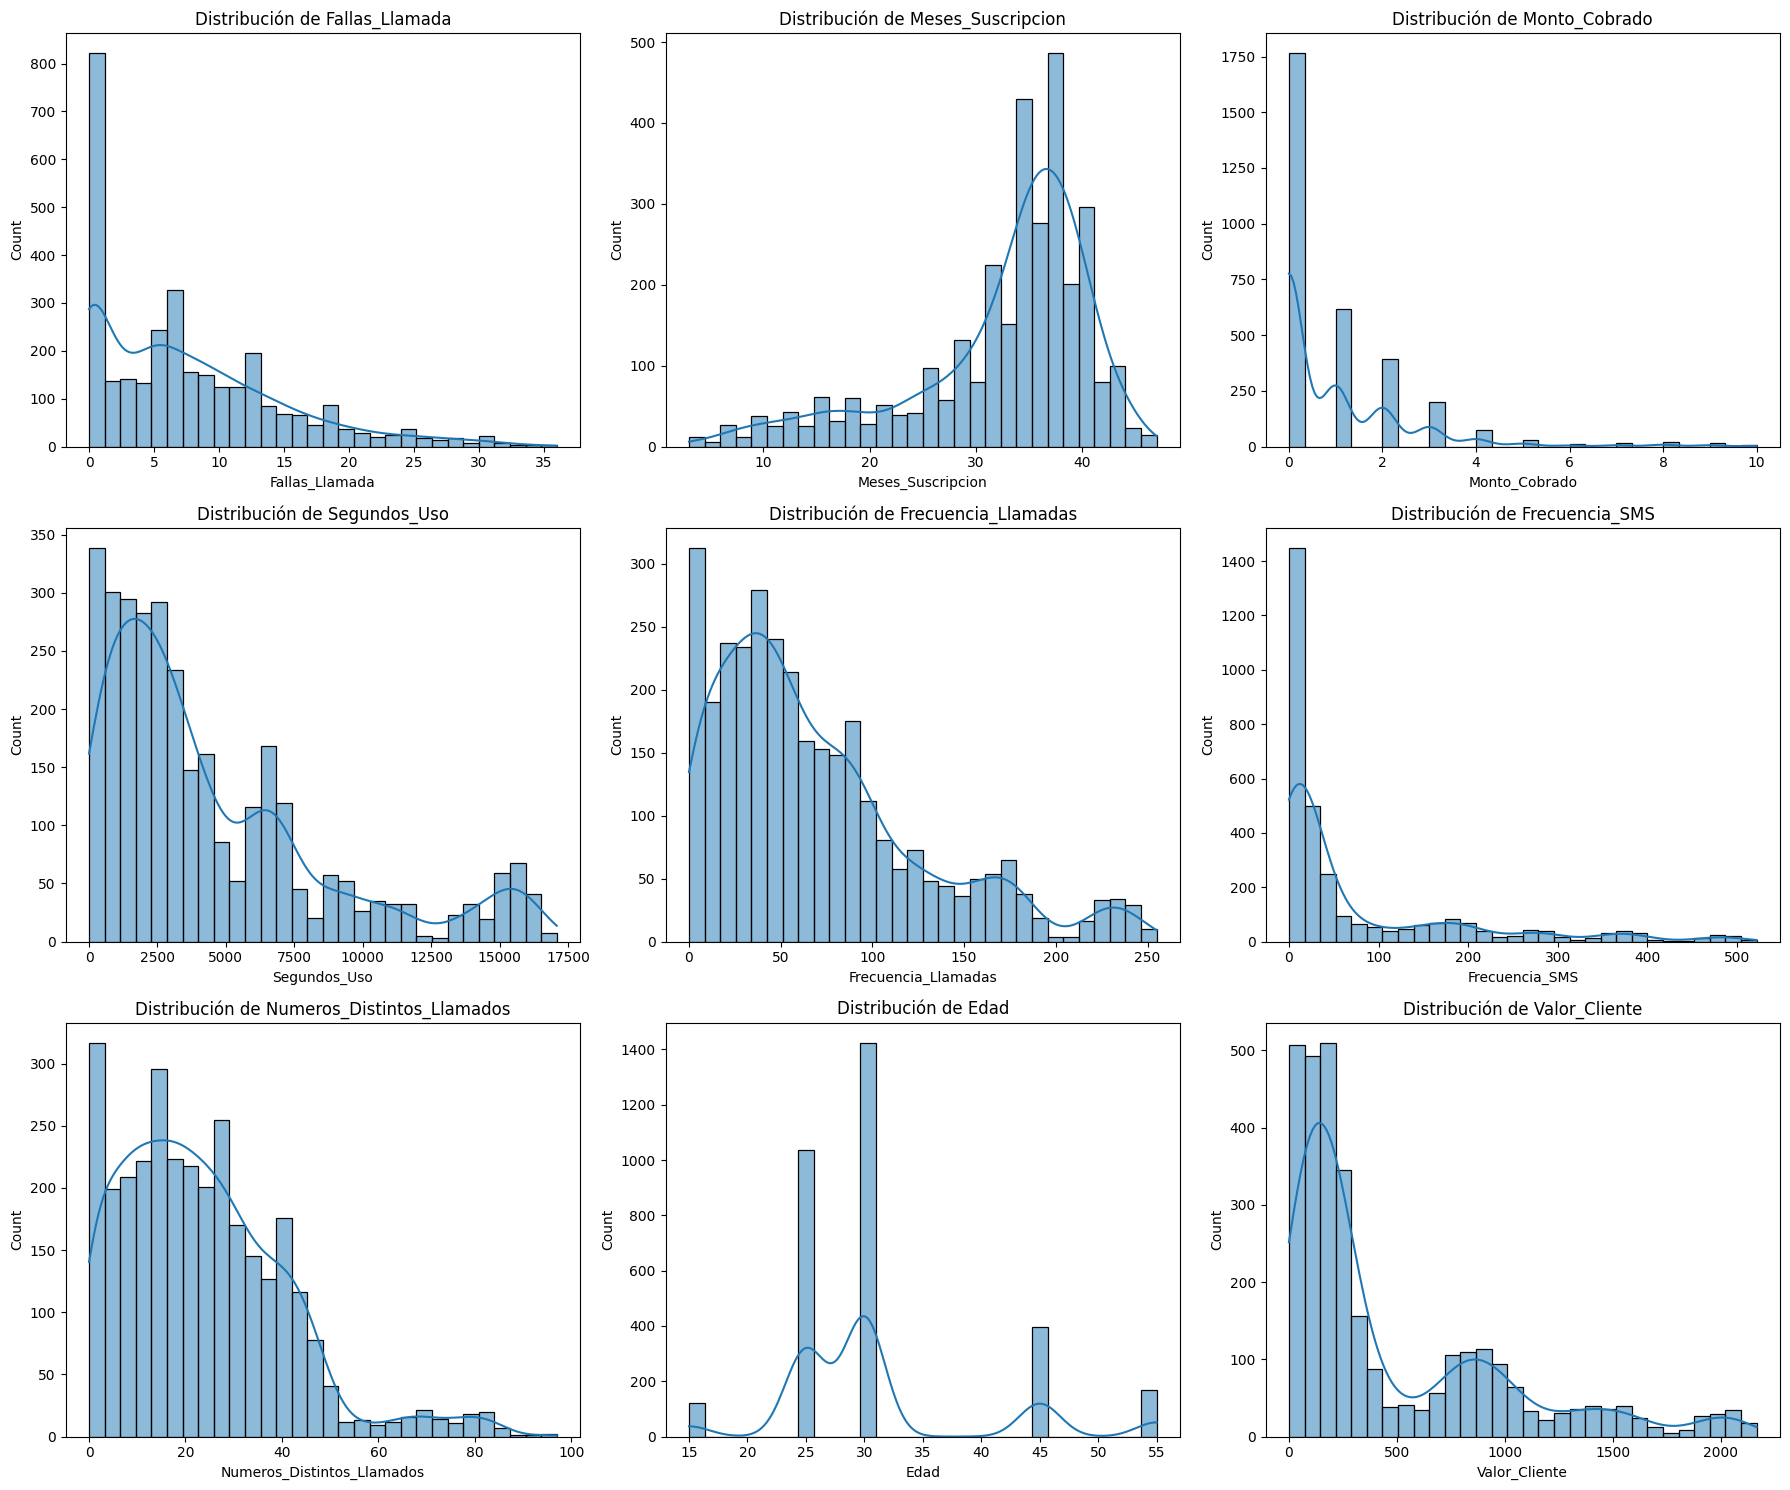

In [136]:
# Lista de variables numéricas
variables_numericas = [
    'Fallas_Llamada', 'Meses_Suscripcion', 'Monto_Cobrado',
    'Segundos_Uso', 'Frecuencia_Llamadas', 'Frecuencia_SMS',
    'Numeros_Distintos_Llamados', 'Edad', 'Valor_Cliente'
]

# Graficar histogramas
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 15))
for i, var in enumerate(variables_numericas):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribución de {var}')
plt.tight_layout()
plt.show()


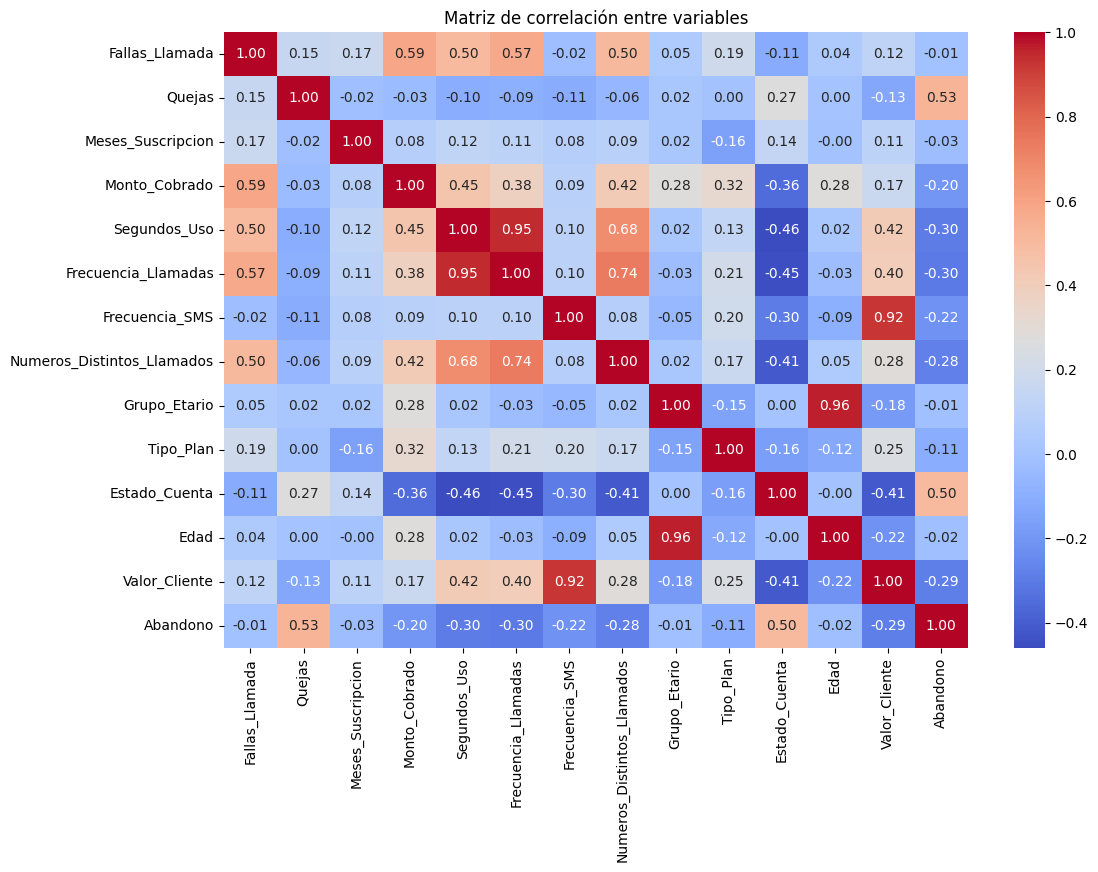

In [137]:
# Mapa de calor de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de correlación entre variables")
plt.show()


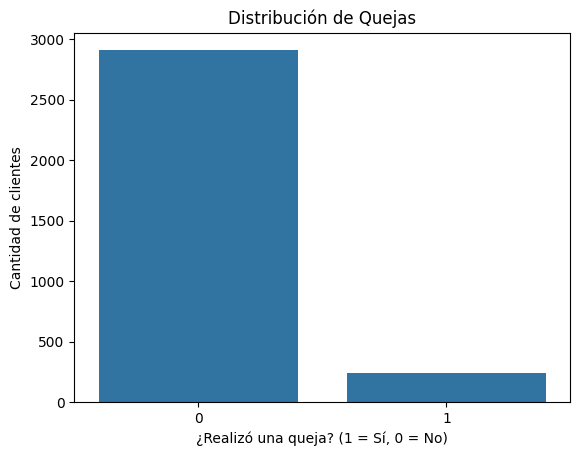

In [43]:
sns.countplot(x='Quejas', data=df)
plt.title("Distribución de Quejas")
plt.xlabel("¿Realizó una queja? (1 = Sí, 0 = No)")
plt.ylabel("Cantidad de clientes")
plt.show()


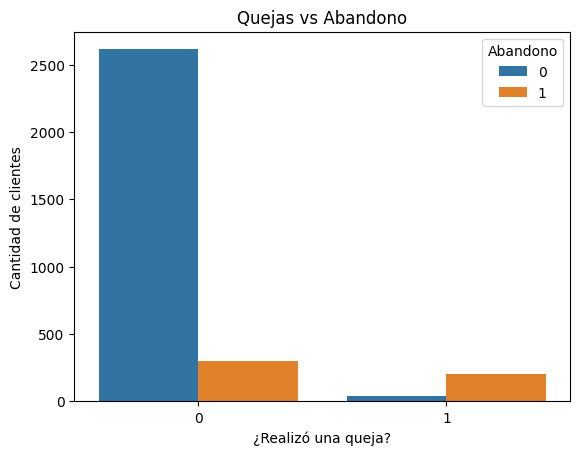

In [44]:
sns.countplot(x='Quejas', hue='Abandono', data=df)
plt.title("Quejas vs Abandono")
plt.xlabel("¿Realizó una queja?")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Abandono")
plt.show()


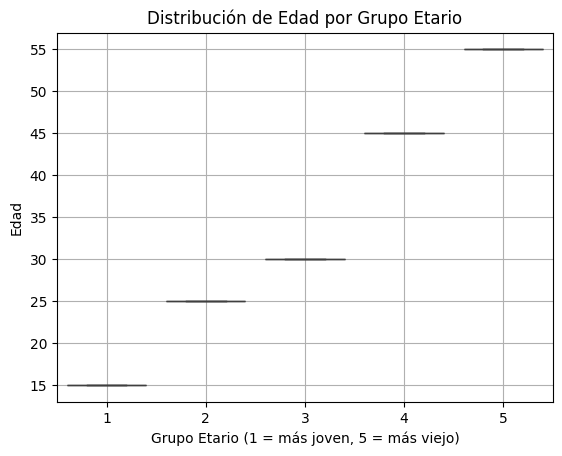

In [45]:
# Ver cómo se distribuyen las edades por grupo etario
sns.boxplot(x="Grupo_Etario", y="Edad", data=df)
plt.title("Distribución de Edad por Grupo Etario")
plt.xlabel("Grupo Etario (1 = más joven, 5 = más viejo)")
plt.ylabel("Edad")
plt.grid(True)
plt.show()


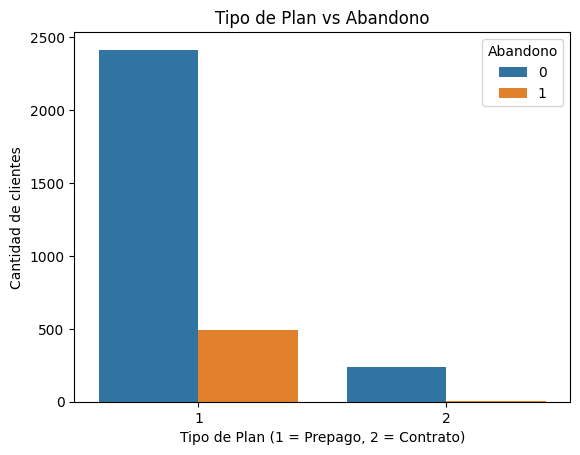

In [46]:
# Conteo de abandono por tipo de plan
sns.countplot(x="Tipo_Plan", hue="Abandono", data=df)
plt.title("Tipo de Plan vs Abandono")
plt.xlabel("Tipo de Plan (1 = Prepago, 2 = Contrato)")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Abandono")
plt.show()


## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - El objetivo de este paso es quedar con variables todas numéricas y en la misma escala.

## Resolución:

## Selección de variables

Para realizar el análisis de clustering, trabajé con un conjunto de variables que reflejan el comportamiento de los clientes en relación al uso del servicio. El objetivo fue conservar únicamente **variables numéricas** que pudieran ser interpretadas por modelos como K-means y DBSCAN, los cuales se basan en cálculos de distancia.

---

### Variables utilizadas

Seleccioné las siguientes variables:

- `Fallas_Llamada`
- `Meses_Suscripcion`
- `Segundos_Uso`
- `Frecuencia_Llamadas`
- `Frecuencia_SMS`
- `Numeros_Distintos_Llamados`
- `Valor_Cliente`

Estas variables fueron elegidas porque:
- Son **numéricas**, lo cual permite el uso de escalado y distancia euclidiana.
- Representan **patrones de comportamiento relevantes** para agrupar clientes (duración, frecuencia, intensidad de uso).
- Reflejan distintas dimensiones del vínculo del cliente con el servicio (tiempo, valor y nivel de interacción).

---

###  Variables descartadas

Se descartaron las siguientes variables por los siguientes motivos:

- `Edad` y `Grupo_Etario`: información redundante, o colineal con otras variables; además, no es una variable comportamental directa.
- `Tipo_Plan`, `Estado_Cuenta`, `Tariff Plan`: son **categóricas** y hubieran requerido codificación (one-hot), lo que distorsiona los algoritmos de clustering basados en distancia.
- `Monto_Cobrado`: altamente correlacionada con `Valor_Cliente` y `Segundos_Uso`, lo que puede introducir redundancia.
- `Quejas`: puede representar ruido si no se interpreta junto a otras variables subjetivas.

---

###  Preprocesamiento aplicado

Una vez seleccionadas las variables, apliqué el siguiente preprocesamiento:

- **Escalado estándar** (`StandardScaler`) para que todas las variables estén en la misma escala (media 0 y desviación estándar 1).


---



In [47]:
from sklearn.preprocessing import StandardScaler

# Variables elegidas
variables_finales = [
    'Fallas_Llamada',
    'Meses_Suscripcion',
    'Segundos_Uso',
    'Frecuencia_Llamadas',
    'Frecuencia_SMS',
    'Numeros_Distintos_Llamados',
    'Valor_Cliente'
]

# definimos el df con las cvariables que vamos a usar
df_modelo = df[variables_finales]

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_modelo)





## 4. **Clustering**  
   

En este apartado aplicará clustering sobre los datos obtenidos del paso 3)

### 4.1 -  K-means
   - Determine el número ideal de clústers usando Silhoutte Score.
   - Aplique K-means sobre los datos procesados del grupo anterior.
   

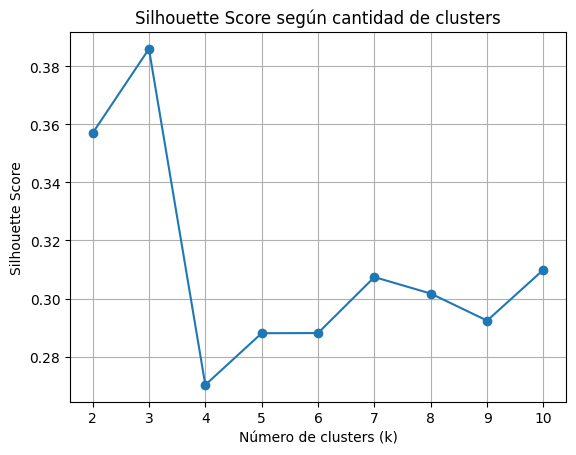

El número óptimo de clusters es: 3


In [68]:
# Calcular Silhouette Score para distintos k
rango_k = range(2, 11)
silhouette_scores = []

for k in rango_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# grafico
plt.plot(rango_k, silhouette_scores, marker='o')
plt.title("Silhouette Score según cantidad de clusters")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Mejor k
mejor_k = rango_k[silhouette_scores.index(max(silhouette_scores))]
print(f"El número óptimo de clusters es: {mejor_k}")

In [80]:


# Aplicar KMeans con k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Obtener los centroides
centroids = kmeans.cluster_centers_


In [70]:
# Crear copia segura del DataFrame antes de modificarlo
df_modelo_clusterizado = df_modelo.copy()
df_modelo_clusterizado['Cluster'] = labels
df_modelo_clusterizado.head()

,Fallas_Llamada,Meses_Suscripcion,Segundos_Uso,Frecuencia_Llamadas,Frecuencia_SMS,Numeros_Distintos_Llamados,Valor_Cliente,Cluster
0,8,38,4370,71,5,17,197.640,0
1,0,39,318,5,7,4,46.035,0
2,10,37,2453,60,359,24,1536.520,1
3,10,38,4198,66,1,35,240.020,0
4,3,38,2393,58,2,33,145.805,0


In [71]:
# Agrupar y obtener promedio por variable dentro de cada cluster
resumen_clusters = df_modelo_clusterizado.groupby('Cluster').mean()

# Mostrar resumen
resumen_clusters

,Fallas_Llamada,Meses_Suscripcion,Segundos_Uso,Frecuencia_Llamadas,Frecuencia_SMS,Numeros_Distintos_Llamados,Valor_Cliente
Cluster,,,,,,,
0,5.733575,32.404035,2292.892395,41.183135,16.543197,17.032074,153.904966
1,5.398214,32.689286,4253.601786,65.816071,283.555357,22.533929,1338.397187
2,15.101979,32.821918,11071.643836,155.764079,60.474886,43.400304,664.480913


## Análisis de Clusters

### Perfil por Cluster

---

###  **Cluster 0 – Usuarios de Bajo Valor y Bajo Uso**

- **Fallas_Llamada**: 5.73  
- **Segundos_Uso**: 2293  
- **Frecuencia_Llamadas**: 41  
- **Frecuencia_SMS**: 16  
- **Valor_Cliente**: $153  

 Clientes poco activos, posiblemente desinteresados o con bajo compromiso.
---

###  **Cluster 1 – Clientes de Alto Valor y Perfil Tradicional**

- **Fallas_Llamada**: 5.40  
- **Segundos_Uso**: 4254  
- **Frecuencia_Llamadas**: 66  
- **Frecuencia_SMS**: 284  
- **Valor_Cliente**: $1338  

 Grupo más rentable y confiable. Envían muchos SMS, lo que indica una fuerte base de usuarios tradicionales.

---

###  **Cluster 2 – Usuarios Intensivos con Problemas**

- **Fallas_Llamada**: 15.10  
- **Segundos_Uso**: 11071  
- **Frecuencia_Llamadas**: 156  
- **Frecuencia_SMS**: 60  
- **Valor_Cliente**: $664  

Usuarios altamente activos pero con muchos problemas reportados. Potencial alto de consumo, pero requieren soporte técnico o mejoras en la experiencia de servicio.

---


### 4.2 Análisis intra-clúster

Para el modelo de K-means con el valor de k (número de clústeres) ideal, analice los datos que pertenecen a cada clústers. ¿Cuáles son sus características / distribución? Puede usar gráficas como box-plots

<Figure size 800x500 with 0 Axes>

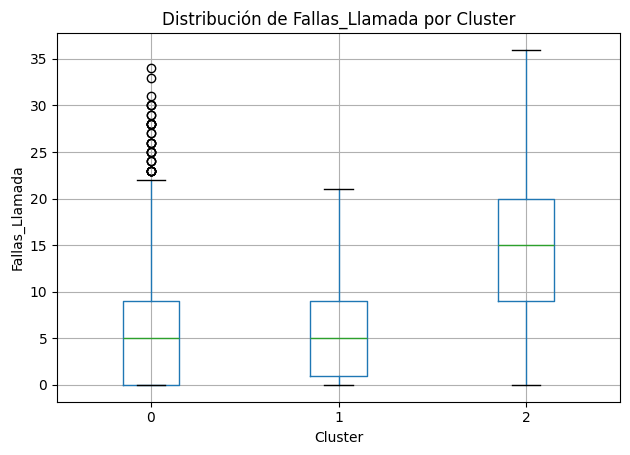

<Figure size 800x500 with 0 Axes>

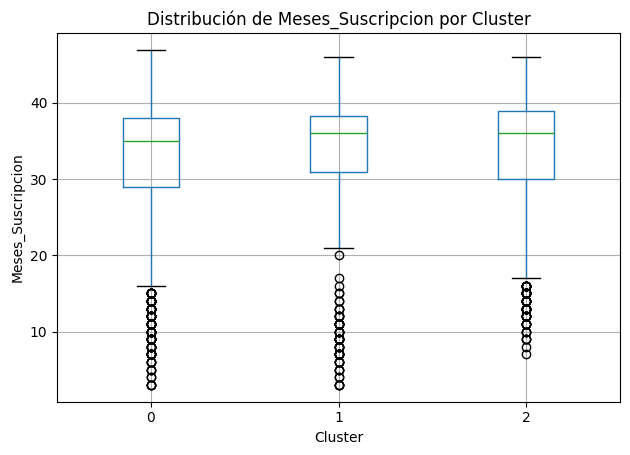

<Figure size 800x500 with 0 Axes>

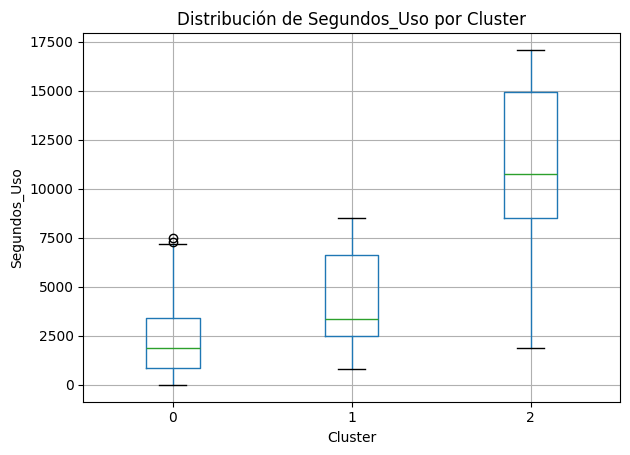

<Figure size 800x500 with 0 Axes>

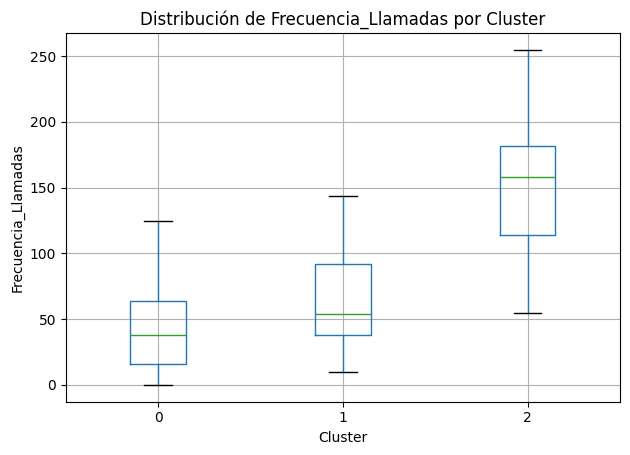

<Figure size 800x500 with 0 Axes>

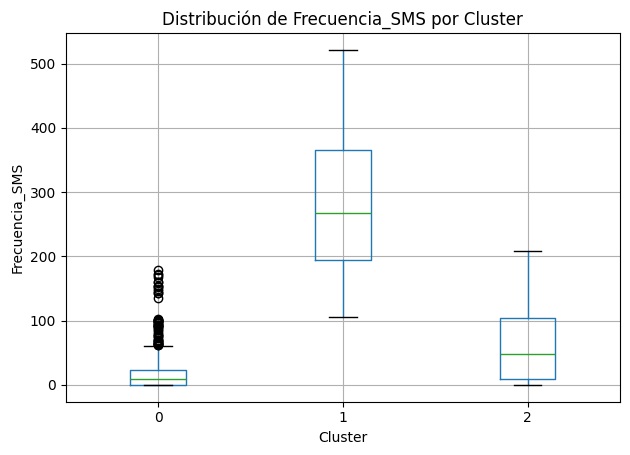

<Figure size 800x500 with 0 Axes>

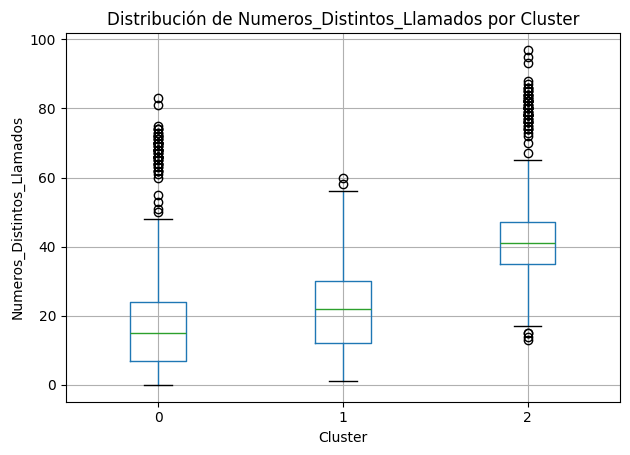

<Figure size 800x500 with 0 Axes>

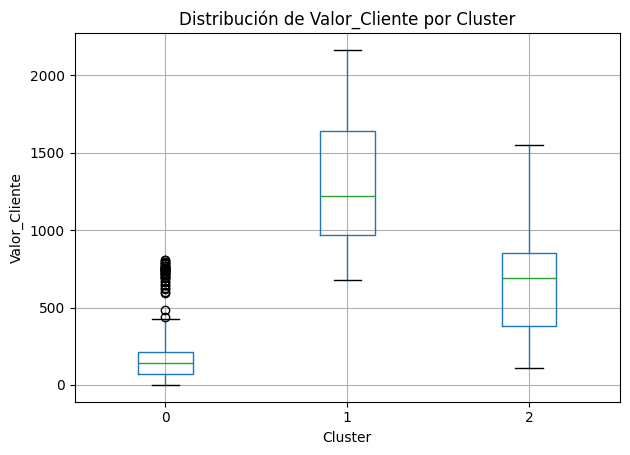

In [52]:


#  Copia del DataFrame original con los clusters asignados
df_clusterizado = df.copy()
df_clusterizado['Cluster'] = labels

# Lista de variables numéricas para analizar
variables_analisis = [
    'Fallas_Llamada',
    'Meses_Suscripcion',
    'Segundos_Uso',
    'Frecuencia_Llamadas',
    'Frecuencia_SMS',
    'Numeros_Distintos_Llamados',
    'Valor_Cliente'
]

# boxplot por cada variable
for var in variables_analisis:
    plt.figure(figsize=(8, 5))
    df_clusterizado.boxplot(column=var, by='Cluster')
    plt.title(f'Distribución de {var} por Cluster')
    plt.suptitle("")  # Quitar título automático extra
    plt.xlabel('Cluster')
    plt.ylabel(var)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### 4.2 Análisis Intra-Clúster

Se aplicó el algoritmo K-means con `k = 3`, determinado previamente mediante el Silhouette Score como el número óptimo de clústeres. A continuación, se analizan las características de cada grupo con base en las variables más relevantes, visualizadas mediante gráficos tipo box-plot.

---

####  Fallas_Llamada
- **Cluster 2**: usuarios con mayor cantidad de fallas (mediana ~15).
- **Clusters 0 y 1**: niveles similares y bajos de fallas (medianas ~5).
- Este indicador sugiere que el **Cluster 2 podría tener mayor insatisfacción o problemas técnicos**.

---

####  Meses_Suscripcion
- Todos los clústeres tienen una **mediana similar (~36 meses)**.
- Esta variable **no contribuye significativamente a la diferenciación** entre grupos.

---

####  Segundos_Uso
- **Cluster 2**: uso más intensivo (mediana > 11.000 seg).
- **Cluster 1**: uso medio.
- **Cluster 0**: uso bajo.
- Este patrón es consistente con el nivel de compromiso del usuario.

---

####  Frecuencia_Llamadas
- **Cluster 2** también lidera en cantidad de llamadas (~156).
- **Cluster 1** es intermedio.
- **Cluster 0** realiza pocas llamadas (~41).
- Se refuerza la idea de que el **Cluster 2 agrupa a usuarios activos**.

---

####  Frecuencia_SMS
- **Cluster 1** se destaca ampliamente con una mediana de **~284 SMS**, lo que lo identifica como un grupo de **usuarios tradicionales**.
- **Cluster 0 y 2** presentan bajos niveles de envío de SMS.

---

####  Numeros_Distintos_Llamados
- **Cluster 2** llama a más contactos distintos (~43).
- **Cluster 1** es intermedio (~22).
- **Cluster 0** tiene un alcance más limitado (~17).

---

####  Valor_Cliente
- **Cluster 1** posee el valor más alto ($1338).
- **Cluster 2** representa un valor intermedio ($664).
- **Cluster 0** es el grupo menos rentable ($153).
- El valor cliente está fuertemente relacionado con el uso del servicio.

---

###  Conclusiones Intra-Clúster

- **Cluster 0**: clientes pasivos, bajo uso, bajo valor económico.
- **Cluster 1**: clientes de alto valor, tradicionales (alta frecuencia de SMS).
- **Cluster 2**: usuarios intensivos en llamadas, pero con mayores problemas técnicos.

El análisis intra-clúster permite **entender el perfil de cada segmento y  según el comportamiento del grupo.



## 5- Reducción de dimensionalidad

### 5.1 Aplicar PCA o t-SNE para reducir la dimensionalidad a 2D/3D y visualizar los datos

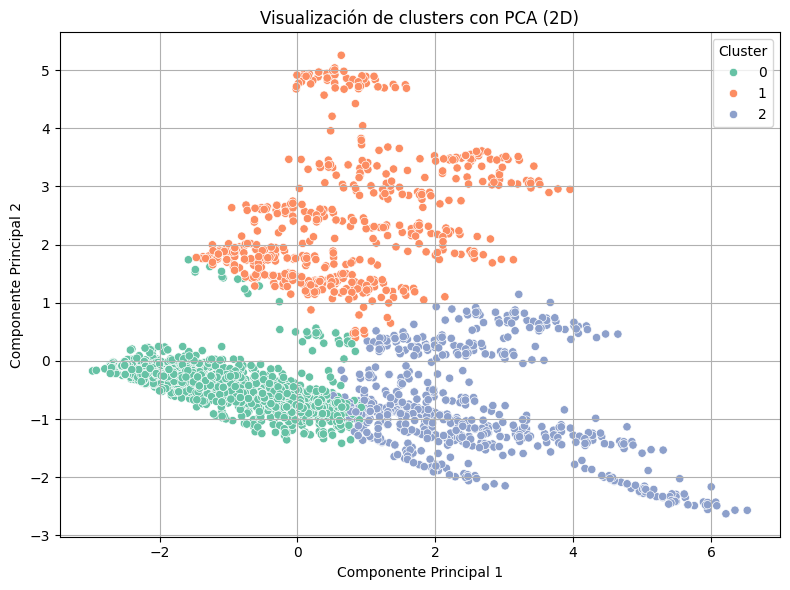

In [122]:

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame con resultados y clusters
df_pca = pd.DataFrame(X_pca, columns=["Componente_1", "Componente_2"])
df_pca["Cluster"] = labels

# Grafico
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="Componente_1", y="Componente_2", hue="Cluster", palette="Set2")
plt.title("Visualización de clusters con PCA (2D)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.tight_layout()
plt.show()


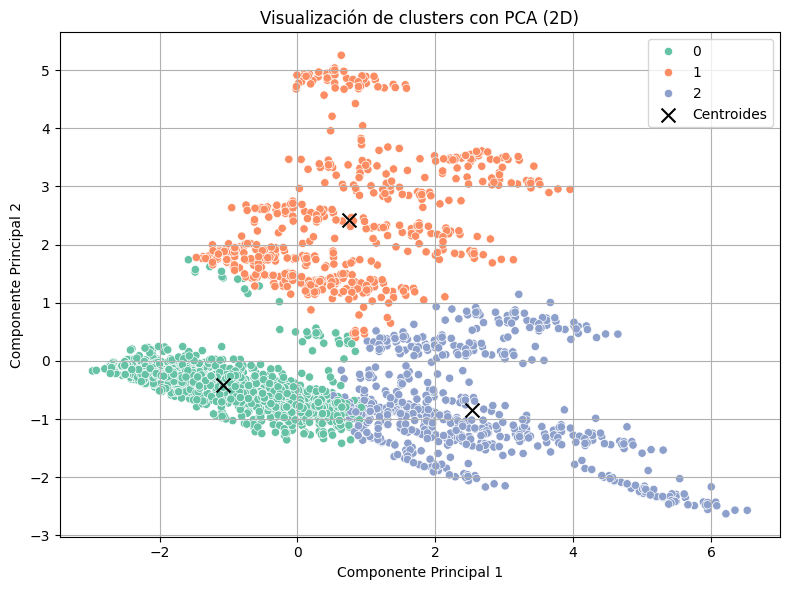

In [113]:

# Grafico con los centroides de cada cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="Componente_1", y="Componente_2", hue="Cluster", palette="Set2")

# Proyectar centroides al espacio PCA
centroides_pca = pca.transform(centroids)

# Agregar centroides como
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], marker='x', s=100, c='black', label='Centroides')

plt.title("Visualización de clusters con PCA (2D)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [114]:

# PCA 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# DataFrame para Plotly
df_plotly = pd.DataFrame(X_pca, columns=["PCA1", "PCA2", "PCA3"])
df_plotly["Cluster"] = df_clusterizado["Cluster"]

# Colores ejecutivos (azul, gris, verde)
color_map = {0: 'blue', 1: 'gray', 2: 'green'}

# Crear gráfico interactivo
fig = px.scatter_3d(
    df_plotly,
    x="PCA1",
    y="PCA2",
    z="PCA3",
    color=df_plotly["Cluster"].map(color_map),
    symbol="Cluster",
    title="Clusters visualizados en 3D con PCA (interactivo)",
    labels={"Cluster": "Cluster"}
)
fig.show()


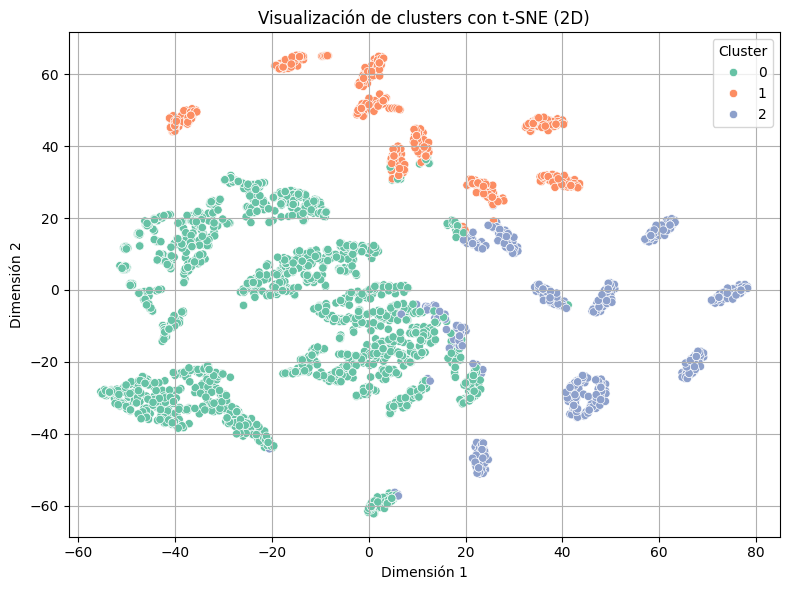

In [118]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Aplicar t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Crear DataFrame con resultados
df_tsne = pd.DataFrame(X_tsne, columns=["Dim_1", "Dim_2"])
df_tsne["Cluster"] = labels

# Visualizar
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tsne, x="Dim_1", y="Dim_2", hue="Cluster", palette="Set2")
plt.title("Visualización de clusters con t-SNE (2D)")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.grid(True)
plt.tight_layout()
plt.show()


### 5.2 Clustering sobre datos reducidos

Aplicar clustering K-means sobre el dataset obtenido en 5.1. Realice los mismos pasos y análisis que realizó para el punto 4) pero con este dataset reducido.

In [124]:

kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca)


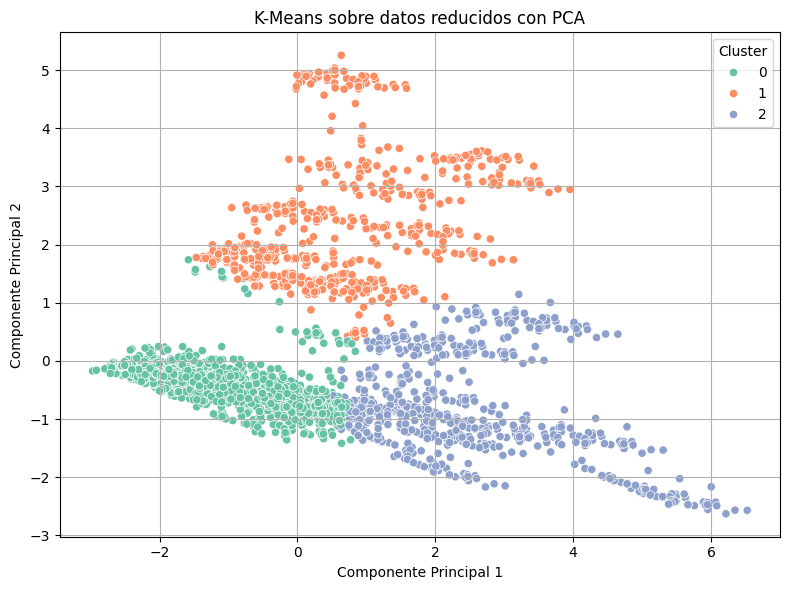

In [123]:
df_pca_cluster = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca_cluster["Cluster"] = labels_pca

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca_cluster, x="PC1", y="PC2", hue="Cluster", palette="Set2")
plt.title("K-Means sobre datos reducidos con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.tight_layout()
plt.show()


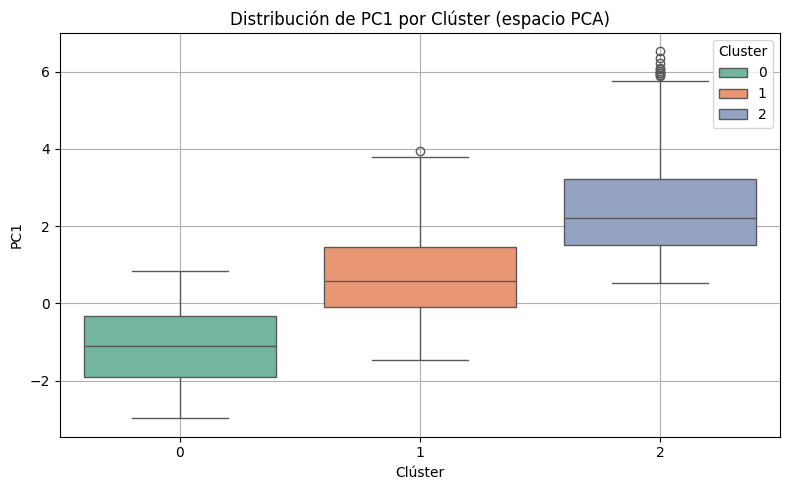

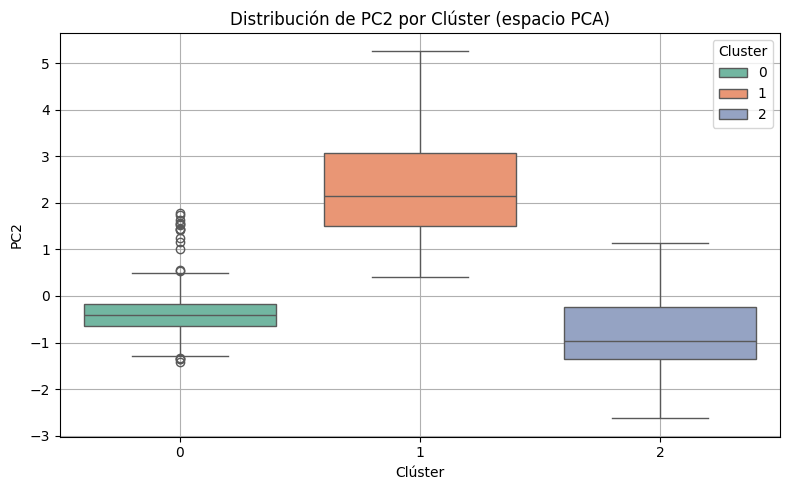

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columnas a analizar
componentes = ["PC1", "PC2"]

# Boxplot por cada componente
for comp in componentes:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_pca_cluster, x="Cluster", y=comp, hue="Cluster", palette="Set2", dodge=False)
    plt.title(f'Distribución de {comp} por Clúster (espacio PCA)')
    plt.xlabel("Clúster")
    plt.ylabel(comp)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


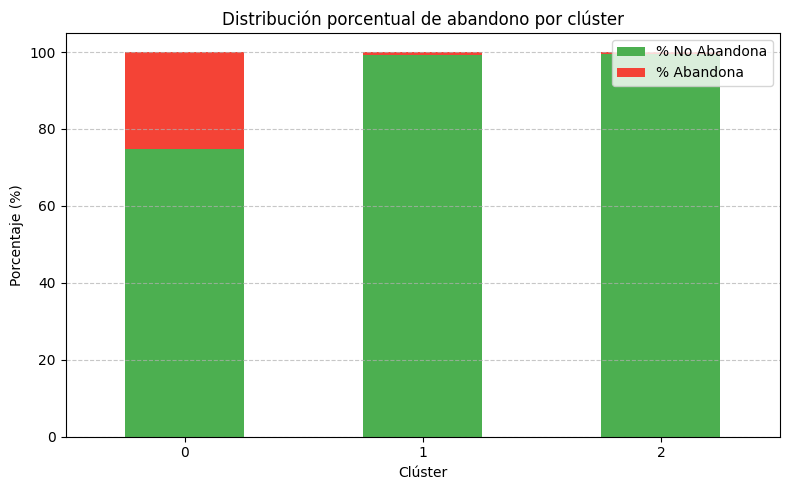

In [127]:

# Crear DataFrame con clusters
df_con_clusters = df.copy()
df_con_clusters["Cluster"] = labels

# Calcular tabla cruzada
cruce = pd.crosstab(df_con_clusters["Cluster"], df_con_clusters["Abandono"])
cruce_percent = pd.crosstab(df_con_clusters["Cluster"], df_con_clusters["Abandono"], normalize='index') * 100

# Crear DataFrame combinado
df_churn_cluster = cruce.copy()
df_churn_cluster["% No Abandona"] = cruce_percent[0].round(2)
df_churn_cluster["% Abandona"] = cruce_percent[1].round(2)
df_churn_cluster.columns = ["No Abandona", "Abandona", "% No Abandona", "% Abandona"]

# Crear gráfico de barras apiladas
df_plot = df_churn_cluster[["% No Abandona", "% Abandona"]]
df_plot.plot(kind="bar", stacked=True, figsize=(8, 5), color=["#4CAF50", "#F44336"])  # verde y rojo

plt.title("Distribución porcentual de abandono por clúster")
plt.xlabel("Clúster")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=0)
plt.legend(loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [128]:
df_churn_cluster

,No Abandona,Abandona,% No Abandona,% Abandona
Cluster,,,,
0,1447,486,74.86,25.14
1,555,5,99.11,0.89
2,653,4,99.39,0.61


## 6- Conclusiones

Escriba sus conclusiones comparando los resultados y experiencia entre aplicar clustering a todo el dataset vs al dataset reducido.

Discutir:

* ¿ Los clústeres se corresponden con clases reales ( si las hay)?
* ¿ La reducción de dimensionalidad mejoró o empeoró el desempeño del clustering?

Fundamente, justifique con sus palabras.

##  Conclusiones

Durante el trabajo apliqué técnicas de clustering con K-means tanto sobre el dataset original como sobre una versión reducida utilizando PCA. El objetivo fue comparar ambos enfoques, interpretar los agrupamientos y evaluar si se relacionaban con la variable real de abandono (Churn).

---

###  Comparación entre clustering completo y reducido

Realicé dos enfoques:

1. Clustering sobre el **dataset original**, utilizando 7 variables relacionadas al comportamiento de los clientes.
2. Clustering sobre el **dataset reducido**, aplicando PCA y conservando solo las dos primeras componentes principales.

---

###  ¿Los clústeres se relacionan con clases reales?

Sí. Al cruzar los resultados con la variable Churn, observé que:

- El Clúster 0 tiene un 25% de abandono, mientras que los Clústeres 1 y 2 tienen tasas menores al 1%.
- Esto indica que el modelo logró identificar perfiles reales de clientes, especialmente aquellos con mayor riesgo de abandonar el servicio.

---

### ¿La reducción de dimensionalidad mejoró o empeoró?

La reducción con PCA no mejoró la segmentación en términos de precisión, ya que se pierde parte de la información original.  
Sin embargo, resultó muy útil para visualizar los clústeres en un espacio de dos dimensiones.  
Los boxplots sobre las componentes principales mostraron que los clústeres se separan de forma clara, sobre todo en la primera componente (PC1).

---

###  Conclusión final

 El clustering con las variables originales fue más valioso para analizar los perfiles de los clientes y entender su relación con el churn.  
 El clustering con PCA fue más útil para explorar visualmente la estructura de los datos, aunque menos interpretable en términos de negocio.

Ambos enfoques se complementan:  
- el primero permite extraer conclusiones accionables, mientras que el segundo facilita la visualización y validación gráfica.


# 7- Bonus: elija una de las siguientes consignas para resolver.



## 7.1 Aplicar DBSCAN sobre su dataset.

Aplique clustering con DBSCAN sobre su dataset en ambas versiones: el dataset completo y reducido (PCA o t-SNE). Evalue los resultados.

In [95]:
from sklearn.cluster import DBSCAN
import numpy as np

# DBSCAN sobre el dataset completo
dbscan_full = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan_full = dbscan_full.fit_predict(X_scaled)

# Contar outliers
outliers_full = np.sum(labels_dbscan_full == -1)
n_clusters_full = len(set(labels_dbscan_full)) - (1 if -1 in labels_dbscan_full else 0)

print(f"[Completo] Clusters encontrados: {n_clusters_full}")
print(f"[Completo] Outliers detectados: {outliers_full}")


[Completo] Clusters encontrados: 2
[Completo] Outliers detectados: 0


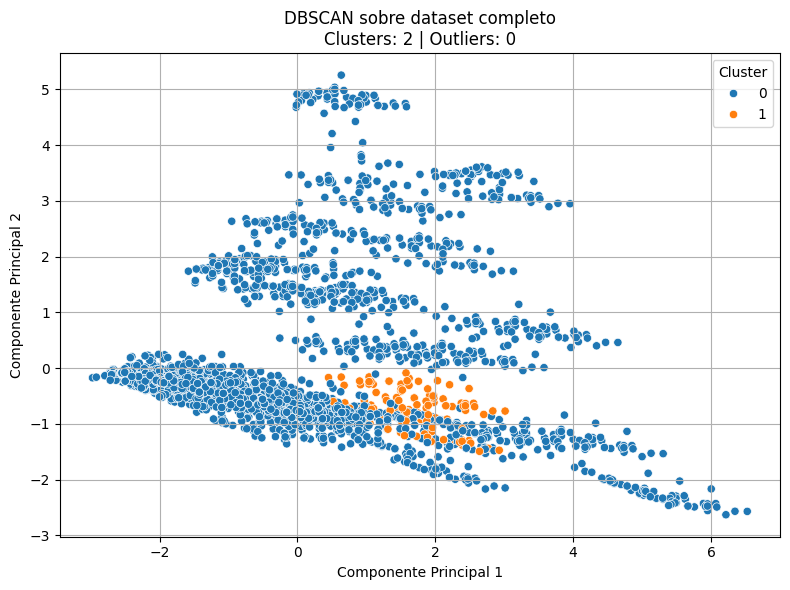

In [97]:


# Reducir a 2 dimensiones para visualizar
pca_dbscan = PCA(n_components=2)
X_pca_dbscan = pca_dbscan.fit_transform(X_scaled)

# Crear DataFrame con los resultados
df_dbscan = pd.DataFrame(X_pca_dbscan, columns=["PC1", "PC2"])
df_dbscan["Cluster"] = labels_dbscan_full

# Definir número de clusters y outliers
outliers_full = np.sum(labels_dbscan_full == -1)
n_clusters_full = len(set(labels_dbscan_full)) - (1 if -1 in labels_dbscan_full else 0)

# Graficar
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_dbscan, x="PC1", y="PC2", hue="Cluster", palette="tab10", legend="full")
plt.title(f"DBSCAN sobre dataset completo\nClusters: {n_clusters_full} | Outliers: {outliers_full}")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [96]:
# DBSCAN sobre el dataset reducido con PCA
dbscan_pca = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan_pca = dbscan_pca.fit_predict(X_pca)

# Contar outliers
outliers_pca = np.sum(labels_dbscan_pca == -1)
n_clusters_pca = len(set(labels_dbscan_pca)) - (1 if -1 in labels_dbscan_pca else 0)

print(f"[PCA] Clusters encontrados: {n_clusters_pca}")
print(f"[PCA] Outliers detectados: {outliers_pca}")


[PCA] Clusters encontrados: 1
[PCA] Outliers detectados: 0


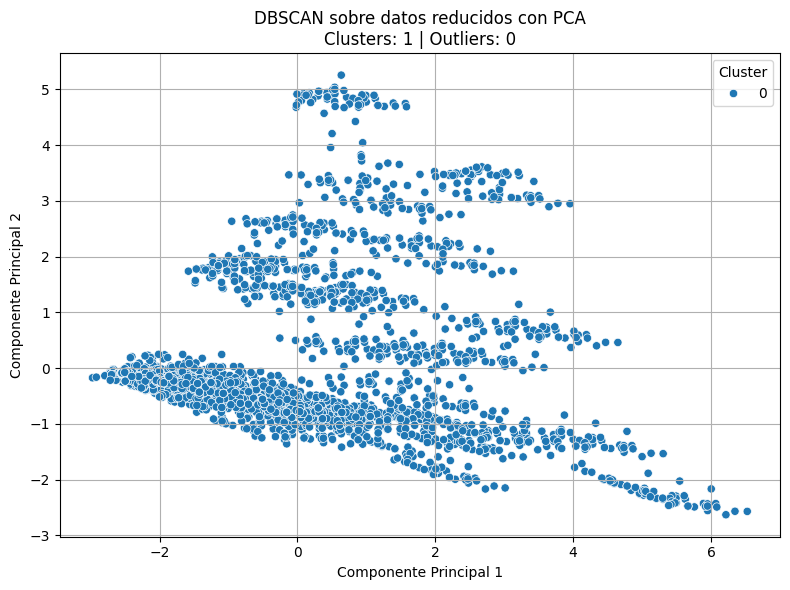

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear DataFrame con los resultados
df_dbscan_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_dbscan_pca["Cluster"] = labels_dbscan_pca

# Graficar
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_dbscan_pca,
    x="PC1",
    y="PC2",
    hue="Cluster",
    palette="tab10",
    legend="full"
)
plt.title(f"DBSCAN sobre datos reducidos con PCA\nClusters: {n_clusters_pca} | Outliers: {outliers_pca}")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.tight_layout()
plt.show()


### Conclusión sobre DBSCAN

La versión de DBSCAN aplicada al dataset completo fue más efectiva para identificar subgrupos, mientras que la aplicación sobre el dataset reducido con **PCA** no permitió separar adecuadamente los clusters.

Esto sugiere que, en este caso, la reducción de dimensionalidad con PCA afectó negativamente la capacidad de DBSCAN para detectar estructuras de densidad presentes en los datos originales.


## 7.2 Análisis de outliers

- Usar DBSCAN para detectar los outliers en su dataset.
- Reducir la dimensionalidad y verificar si los outliers son identificables visualmente en 2D/3D.
- Escriba sus reflexiones: ¿ los outliers forman un clúster propio? ¿PCA / t-SNE preserva las anomalías?

#Referencias

- ChatGPT – Asistencia en redacción, análisis.
- DataCamp – [Tutorial sobre el algoritmo DBSCAN](https://www.datacamp.com/es/tutorial/dbscan-clustering-algorithm)
- Apuntes de clase – distintos colabs.
- UCI Machine Learning Repository – [Iranian Churn Dataset](https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset)
- YouTube – [Video explicativo de clustering con K.means](https://www.youtube.com/watch?v=mICySHB0fh4)
